In [1]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana as pdna
import os
from tqdm import tqdm

In [2]:
#amenities_with_neighborhood.to_file("amenities_with_neighborhood.geojson", driver='GeoJSON')
amenities_with_neighborhood = gpd.read_file('../dataframes/amenities_with_neighborhood.geojson')

In [3]:
# check number of amenities labelled hospital
amenities_with_neighborhood[amenities_with_neighborhood['amenity'] == 'hospital']

,element_type,osmid,direction,amenity,name,category,index_right,Arrondissement,distance_to_centroid,distance_in_m,geometry
1003,node,2323810748,None,hospital,Clinique médicale 3600,Health care,8.0,Mercier–Hochelaga-Maisonneuve,0.034730,3861.804464,POINT (-73.54458 45.54513)
1225,node,2496131041,None,hospital,CLSC de Mercier-Est-Anjou,Health care,8.0,Mercier–Hochelaga-Maisonneuve,0.034205,3803.386551,POINT (-73.52706 45.61175)
1770,node,3635729635,None,hospital,CLSC Le Plateau-Mont-Royal,Health care,6.0,Le Plateau-Mont-Royal,0.012484,1388.162951,POINT (-73.57380 45.53646)
4629,node,10792747906,None,hospital,Complexe médicale Saint Laurent,Health care,13.0,Saint-Laurent,0.024493,2723.548875,POINT (-73.69625 45.51616)
4834,node,11060200105,None,hospital,CHUM,Health care,16.0,Ville-Marie,0.005763,640.800511,POINT (-73.55677 45.51161)
5723,way,27337520,None,hospital,St. Mary's Hospital,Health care,2.0,Côte-des-Neiges–Notre-Dame-de-Grâce,0.012767,1419.607916,POINT (-73.62387 45.49492)
5731,way,30176656,None,hospital,Hôpital général de Montréal,Health care,16.0,Ville-Marie,0.029263,3253.913799,POINT (-73.58861 45.49712)
5742,way,38718894,None,hospital,Hopital de réadaptation Villa Medica,Health care,6.0,Le Plateau-Mont-Royal,0.016392,1822.663507,POINT (-73.56871 45.51497)
6047,way,100902617,None,hospital,Hôpital Maisonneuve-Rosemont,Health care,12.0,Rosemont–La Petite-Patrie,0.030360,3375.834290,POINT (-73.55866 45.57453)
6048,way,101122868,None,hospital,Hôpital Maisonneuve-Rosemont,Health care,12.0,Rosemont–La Petite-Patrie,0.030182,3356.074022,POINT (-73.56230 45.57750)


In [4]:
neighbourhoods = list(amenities_with_neighborhood['Arrondissement'].unique())[:-1]
neighbourhoods = [neighborhood + ', Montreal, Canada' for neighborhood in neighbourhoods]

In [18]:
# Define the string to be replaced and its replacement
old_string = "L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro, Montreal, Canada"
new_string = "L'Île-Bizard–Sainte-Geneviève, Montreal, Canada"

# Iterate through the list and replace the old string with the new one
for i, neighborhood in enumerate(neighbourhoods):
    if neighborhood == old_string:
        neighbourhoods[i] = new_string

print(neighbourhoods)


['Ahuntsic-Cartierville, Montreal, Canada', 'Verdun, Montreal, Canada', 'Ville-Marie, Montreal, Canada', 'Le Plateau-Mont-Royal, Montreal, Canada', 'Outremont, Montreal, Canada', 'Rosemont–La Petite-Patrie, Montreal, Canada', 'Villeray–Saint-Michel–Parc-Extension, Montreal, Canada', 'Mercier–Hochelaga-Maisonneuve, Montreal, Canada', 'Le Sud-Ouest, Montreal, Canada', 'Anjou, Montreal, Canada', 'Saint-Léonard, Montreal, Canada', 'Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada', 'Saint-Laurent, Montreal, Canada', 'Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada', "L'Île-Bizard–Sainte-Geneviève, Montreal, Canada", 'LaSalle, Montreal, Canada', 'Lachine, Montreal, Canada', 'Montréal-Nord, Montreal, Canada']


In [6]:
#amenities_of_interest = ['restaurant', 'cafe', 'school']
place = 'Montreal, Canada'
type_of_transportation = 'walk'
#tags = {'amenity': amenities_of_interest}
#tags = {'shop': ['grocery', 'greengrocer', 'supermarket']}
tags = {'amenity':'school'}
walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

In [57]:
# FOR testing drive graphs

#amenities_of_interest = ['restaurant', 'cafe', 'school']
place = 'Montreal, Canada'
type_of_transportation = 'drive'
#tags = {'amenity': amenities_of_interest}
#tags = {'shop': ['grocery', 'greengrocer', 'supermarket']}
tags = {'amenity':'hospital'}
drive_time = 15  # max walking horizon in minutes
drive_speed = 50  # km per hour
drive_time_sec = drive_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

In [58]:
print(tags)

{'amenity': 'hospital'}


In [59]:
amenities = ox.geometries_from_place(place, tags=tags)
amenities = amenities.to_crs('EPSG:25832')
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
centroids = amenities.centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_22289/31444245.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenities = ox.geometries_from_place(place, tags=tags)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
# # RUN ONLY ONCE TO SAVE THE GRAPHS - ALREADY DONE

# graphs = {}

# # specify parameters for the analysis
# walk_time = 15  # max walking horizon in minutes
# walk_speed = 5  # km per hour
# walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_walk_neighborhood = ox.graph_from_place(neighborhood, network_type='walk') # type of transportation is set here

#     for u, v, data in G_walk_neighborhood.edges(data=True):
#         data['speed_kph'] = walk_speed
#     G_walk_neighborhood = ox.add_edge_travel_times(G_walk_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_walk_neighborhood, f"../graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     graphs[neighborhood] = G_walk_neighborhood

In [10]:
# rename "L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro, Montreal, Canada" to "L'Île-Bizard–Sainte-Geneviève, Montreal, Canada" in neighborhoods list
neighbourhoods[0] = "L'Île-Bizard–Sainte-Geneviève, Montreal, Canada"

In [12]:
# remove "L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro, Montreal, Canada" from neighborhoods list
neighbourhoods = neighbourhoods[1:]

In [19]:
neighbourhoods

['Ahuntsic-Cartierville, Montreal, Canada',
 'Verdun, Montreal, Canada',
 'Ville-Marie, Montreal, Canada',
 'Le Plateau-Mont-Royal, Montreal, Canada',
 'Outremont, Montreal, Canada',
 'Rosemont–La Petite-Patrie, Montreal, Canada',
 'Villeray–Saint-Michel–Parc-Extension, Montreal, Canada',
 'Mercier–Hochelaga-Maisonneuve, Montreal, Canada',
 'Le Sud-Ouest, Montreal, Canada',
 'Anjou, Montreal, Canada',
 'Saint-Léonard, Montreal, Canada',
 'Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada',
 'Saint-Laurent, Montreal, Canada',
 'Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada',
 "L'Île-Bizard–Sainte-Geneviève, Montreal, Canada",
 'LaSalle, Montreal, Canada',
 'Lachine, Montreal, Canada',
 'Montréal-Nord, Montreal, Canada']

In [15]:
# # RUN ONLY ONCE TO SAVE THE GRAPHS - now for bikes

# graphs = {}

# # specify parameters for the analysis
# bike_time = 15  # max walking horizon in minutes
# bike_speed = 15  # km per hour
# bike_time_sec = bike_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_bike_neighborhood = ox.graph_from_place(neighborhood, network_type='bike') # type of transportation is set here

#     for u, v, data in G_bike_neighborhood.edges(data=True):
#         data['speed_kph'] = bike_speed
#     G_bike_neighborhood = ox.add_edge_travel_times(G_bike_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_bike_neighborhood, f"../graphs/G_bike_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     graphs[neighborhood] = G_bike_neighborhood

100%|██████████| 17/17 [01:07<00:00,  3.97s/it]


In [20]:
# # RUN ONLY ONCE TO SAVE THE GRAPHS - now for driving

# graphs = {}

# # specify parameters for the analysis
# drive_time = 15  # max walking horizon in minutes
# drive_speed = 50  # km per hour
# drive_time_sec = drive_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_drive_neighborhood = ox.graph_from_place(neighborhood, network_type='drive') # type of transportation is set here

#     for u, v, data in G_drive_neighborhood.edges(data=True):
#         data['speed_kph'] = drive_speed
#     G_drive_neighborhood = ox.add_edge_travel_times(G_drive_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_drive_neighborhood, f"../graphs/drive/G_drive_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     graphs[neighborhood] = G_drive_neighborhood

100%|██████████| 18/18 [01:12<00:00,  4.03s/it]


In [3]:
graphs = {}
graphs_dir = '../graphs/walk'

for file_name in os.listdir(graphs_dir):
    if file_name.endswith(".graphml"):
        neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
        file_path = os.path.join(graphs_dir, file_name)
        G_walk_neighborhood = ox.load_graphml(file_path)

        graphs[neighborhood] = G_walk_neighborhood


In [7]:
# to test driving graphs

graphs = {}
graphs_dir = '../graphs/drive'

for file_name in os.listdir(graphs_dir):
    if file_name.endswith(".graphml"):
        neighborhood = file_name.replace("G_drive_", "").replace(".graphml", "")
        file_path = os.path.join(graphs_dir, file_name)
        G_drive_neighborhood = ox.load_graphml(file_path)

        graphs[neighborhood] = G_drive_neighborhood


In [8]:
pandanas = {}

if pandanas == {}:
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

        network = pdna.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network

 11%|█         | 2/18 [00:00<00:02,  5.48it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 568
Setting CH edge vector of size 1547
Range graph removed 1716 edges of 3094
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1174
Setting CH edge vector of size 2438
Range graph removed 1158 edges of 4876
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 22%|██▏       | 4/18 [00:00<00:02,  5.92it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1589
Setting CH edge vector of size 3865
Range graph removed 2722 edges of 7730
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 908
Setting CH edge vector of size 2466
Range graph removed 2164 edges of 4932
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 33%|███▎      | 6/18 [00:00<00:01,  7.19it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 946
Setting CH edge vector of size 2338
Range graph removed 1526 edges of 4676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 663
Setting CH edge vector of size 1496
Range graph removed 762 edges of 2992
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 39%|███▉      | 7/18 [00:01<00:01,  6.98it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 910
Setting CH edge vector of size 2487
Range graph removed 2210 edges of 4974
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:01<00:01,  5.78it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1744
Setting CH edge vector of size 4113
Range graph removed 2838 edges of 8226
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 742
Setting CH edge vector of size 1748
Range graph removed 1286 edges of 3496
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 242
Setting CH edge vector of size 620
Range graph removed 502 edges of 1240
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 61%|██████    | 11/18 [00:01<00:00,  7.31it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1181
Setting CH edge vector of size 2743
Range graph removed 1722 edges of 5486
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 

 72%|███████▏  | 13/18 [00:02<00:00,  6.83it/s]

8 threads.
Setting CH node vector of size 1483
Setting CH edge vector of size 3641
Range graph removed 2420 edges of 7282
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 949
Setting CH edge vector of size 2170
Range graph removed 1338 edges of 4340
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 83%|████████▎ | 15/18 [00:02<00:00,  7.54it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 713
Setting CH edge vector of size 1793
Range graph removed 1478 edges of 3586
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 890
Setting CH edge vector of size 2182
Range graph removed 1386 edges of 4364
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 297
Setting CH edge vector of size 767
Range graph removed 554 edges of 1534
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [00:02<00:00,  6.28it/s]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1938
Setting CH edge vector of size 5262
Range graph removed 4600 edges of 10524
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1102
Setting CH edge vector of size 2547
Range graph removed 1494 edges of 5094
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

In [9]:
  # Initialize dictionary for the current amenity
    
for neighborhood, pandana in tqdm(pandanas.items()):
    print('Calculating distances for: ', 'school')
    print('Calculating distances for: ', neighborhood)
    pandana.set_pois(category='school',
                    maxdist=walk_time_sec,
                    maxitems=3,
                    x_col=centroids.x,
                    y_col=centroids.y)
        
    distances = pandana.nearest_pois(distance=walk_time_sec,
                                         category='school',
                                         num_pois=3)
        
    distances['travel_time'] = distances[1] / 60
    walking_distances = distances

 11%|█         | 2/18 [00:00<00:01, 14.05it/s]

Calculating distances for:  school
Calculating distances for:  Mercier–Hochelaga-Maisonneuve, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Rosemont–La Petite-Patrie, Montreal, Canada


 33%|███▎      | 6/18 [00:00<00:00, 16.26it/s]

Calculating distances for:  school
Calculating distances for:  Outremont, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Le Sud-Ouest, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Saint-Laurent, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Verdun, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Anjou, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Saint-Léonard, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Lachine, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Villeray–Saint-Michel–Parc-Extension, Montreal, Canada


 78%|███████▊  | 14/18 [00:01<00:00,  7.90it/s]

Calculating distances for:  school
Calculating distances for:  Le Plateau-Mont-Royal, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  L'Île_Bizard_Sainte_Geneviève, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Ville-Marie, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  Ahuntsic-Cartierville, Montreal, Canada


100%|██████████| 18/18 [00:01<00:00,  9.83it/s]

Calculating distances for:  school
Calculating distances for:  Montréal-Nord, Montreal, Canada
Calculating distances for:  school
Calculating distances for:  LaSalle, Montreal, Canada


In [48]:
# to test with driving graph/distances

  # Initialize dictionary for the current amenity
    
for neighborhood, pandana in tqdm(pandanas.items()):
    print('Calculating distances for: ', 'hospital')
    print('Calculating distances for: ', neighborhood)
    pandana.set_pois(category='hospital',
                    maxdist=drive_time_sec,
                    maxitems=3,
                    x_col=centroids.x,
                    y_col=centroids.y)
        
    distances = pandana.nearest_pois(distance=drive_time_sec,
                                         category='hospital',
                                         num_pois=3)
        
    distances['travel_time'] = distances[1] / 60
    drive_distances = distances

100%|██████████| 18/18 [00:00<00:00, 98.89it/s]

Calculating distances for:  hospital
Calculating distances for:  L'Île-Bizard–Sainte-Geneviève, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Ville-Marie, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Ahuntsic-Cartierville, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  LaSalle, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Rosemont–La Petite-Patrie, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Le Plateau-Mont-Royal, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Saint-Léonard, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Saint-Laurent, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Anjou, Montreal, Canada
Calculating distances for:  hospital
Calculating distances for:  Outremont, Montreal, Canada
Calcul

In [11]:
walking_distances

,1,2,3,travel_time
osmid,,,,
31630405,28.200001,38.099998,42.599998,0.470000
8916727791,33.099998,33.200001,45.500000,0.551667
1765623751,36.700001,46.599998,51.099998,0.611667
31630568,14.400000,23.200001,25.500000,0.240000
3346043819,13.700000,22.799999,24.799999,0.228333
...,...,...,...,...
11557702015,0.000000,0.000000,0.000000,0.000000
11564332390,33.099998,33.099998,37.900002,0.551667
11565235214,12.900000,12.900000,12.900000,0.215000


In [11]:
#amenities_of_interest = ['restaurant', 'cafe', 'school']

walking_distances = {}  # Dictionary to store walking distances for each amenity

for amenity in tags:
    walking_distances[amenity] = {}  # Initialize dictionary for the current amenity
    
    for neighborhood, pandana in tqdm(pandanas.items()):
        print('Calculating distances for: ', amenity)
        print('Calculating distances for: ', neighborhood)
        pandana.set_pois(category=amenity,
                         maxdist=walk_time_sec,
                         maxitems=3,
                         x_col=centroids.x,
                         y_col=centroids.y)
        
        distances = pandana.nearest_pois(distance=walk_time_sec,
                                         category=amenity,
                                         num_pois=3)
        
        distances['travel_time'] = distances[1] / 60
        walking_distances[amenity][neighborhood] = distances

 11%|█         | 2/18 [00:00<00:01, 14.75it/s]

Calculating distances for:  amenity
Calculating distances for:  Mercier–Hochelaga-Maisonneuve, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Rosemont–La Petite-Patrie, Montreal, Canada


 33%|███▎      | 6/18 [00:00<00:00, 17.21it/s]

Calculating distances for:  amenity
Calculating distances for:  Outremont, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Le Sud-Ouest, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Saint-Laurent, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Verdun, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Anjou, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Saint-Léonard, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Lachine, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Villeray–Saint-Michel–Parc-Extension, Montreal, Canada


 78%|███████▊  | 14/18 [00:00<00:00, 23.80it/s]

Calculating distances for:  amenity
Calculating distances for:  Le Plateau-Mont-Royal, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  L'Île_Bizard_Sainte_Geneviève, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Ville-Marie, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Ahuntsic-Cartierville, Montreal, Canada


100%|██████████| 18/18 [00:00<00:00, 23.14it/s]

Calculating distances for:  amenity
Calculating distances for:  Montréal-Nord, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  LaSalle, Montreal, Canada


In [49]:
# to test driving graphs

# amenities_of_interest = ['']

drive_distances = {}  # Dictionary to store walking distances for each amenity

for amenity in tags:
    drive_distances[amenity] = {}  # Initialize dictionary for the current amenity
    
    for neighborhood, pandana in tqdm(pandanas.items()):
        print('Calculating distances for: ', amenity)
        print('Calculating distances for: ', neighborhood)
        pandana.set_pois(category=amenity,
                         maxdist=drive_time_sec,
                         maxitems=3,
                         x_col=centroids.x,
                         y_col=centroids.y)
        
        distances = pandana.nearest_pois(distance=drive_time_sec,
                                         category=amenity,
                                         num_pois=3)
        
        distances['travel_time'] = distances[1] / 60
        drive_distances[amenity][neighborhood] = distances

100%|██████████| 18/18 [00:00<00:00, 122.38it/s]

Calculating distances for:  amenity
Calculating distances for:  L'Île-Bizard–Sainte-Geneviève, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Ville-Marie, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Ahuntsic-Cartierville, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  LaSalle, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Rosemont–La Petite-Patrie, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Le Plateau-Mont-Royal, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Saint-Léonard, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Saint-Laurent, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Anjou, Montreal, Canada
Calculating distances for:  amenity
Calculating distances for:  Outremont, Montreal, Canada
Calculating dist

In [50]:
drive_distances['amenity']['Ahuntsic-Cartierville, Montreal, Canada']['travel_time'].mean()

0.49901825063679234

In [16]:
df = pd.DataFrame(walking_distances) # Now df contains all the walking distances for each amenity in each neighborhood
neighborhood = 'Mercier–Hochelaga-Maisonneuve, Montreal, Canada'
amenity = 'amenity'

# Filter the DataFrame based on the specified neighborhood and amenity
filtered_distances = df.loc[neighborhood, amenity]

In [30]:
#all_distances_walk = pd.concat([df.assign(neighborhood=name) for name, df in walking_distances.items()], ignore_index=True)
#all_distances_walk = all_distances_walk.sort_values(by='travel_time')
#all_distances_walk.to_csv('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/distances/all_distances_bike.csv', index=False) 

In [18]:
G_walk_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
distances_anjou_test = filtered_distances = df.loc['Anjou, Montreal, Canada', 'amenity']

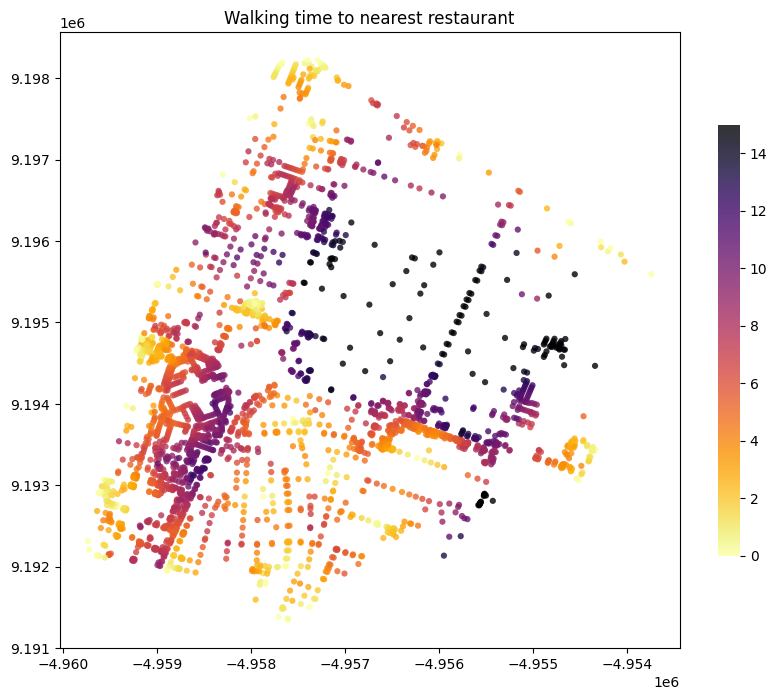

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot distance to nearest amenity from each node
# ox.plot_graph(G_walk_anjou, ax=ax, node_size=0, edge_linewidth=0.1,
#                         edge_color='gray', show=False, close=False)

nodes_anjou = pandana_anjou.nodes_df[['x', 'y']]

sc = ax.scatter(x=nodes_anjou['x'],
                y=nodes_anjou['y'], 
                c=distances_anjou_test['travel_time'], # column to plot (distance to nearest store)
                s=20, # size
                cmap='inferno_r',
                edgecolors='none',
                alpha=0.8)

ax.set_title('Walking time to nearest restaurant')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')

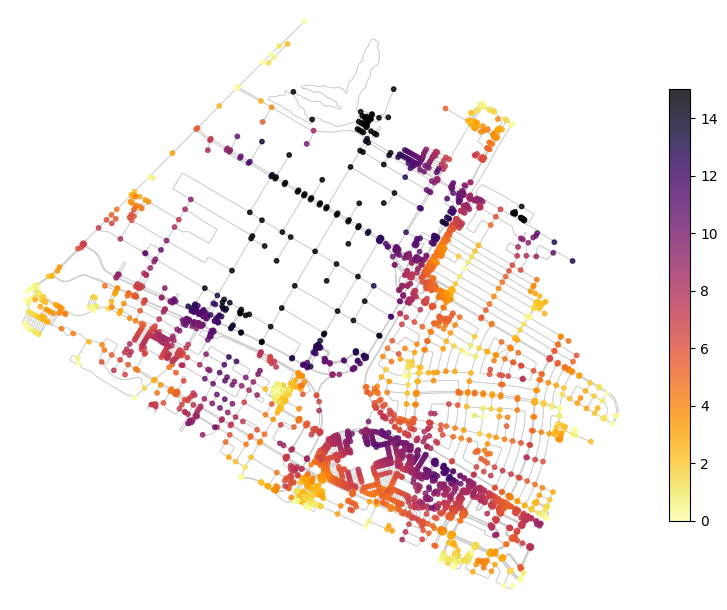

In [26]:
# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Anjou, Montreal, Canada', network_type='walk')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=distances_anjou_test['travel_time'], s=10, cmap='inferno_r', alpha=0.8)

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.7)

# Show the plot
plt.show()

In [38]:
# to test driving graphs

df = pd.DataFrame(drive_distances) # Now df contains all the walking distances for each amenity in each neighborhood
neighborhood = 'Anjou, Montreal, Canada'
amenity = 'amenity'

# Filter the DataFrame based on the specified neighborhood and amenity
filtered_distances = df.loc[neighborhood, amenity]

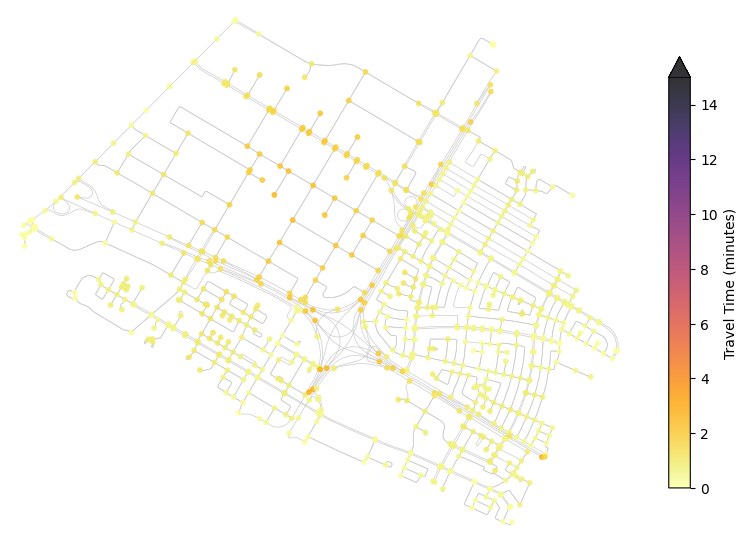

In [39]:
# THE FOLLOWING WORKS - USE TO PLOT DRIVING DISTANCES

# to test driving graphs


G_drive_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
distances_anjou_test = filtered_distances = df.loc['Anjou, Montreal, Canada', 'amenity']

# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Anjou, Montreal, Canada', network_type='drive')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)


# Set the actual data range
data_max = distances_anjou_test['travel_time'].max()

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=distances_anjou_test['travel_time'], s=10, cmap='inferno_r', alpha=0.8, vmin=0, vmax=15)

# Add colorbar with custom scale
cbar = plt.colorbar(sc, ax=ax, shrink=0.7, extend='max')  # Extend colorbar to cover full range
cbar.set_label('Travel Time (minutes)')  # Set colorbar label

# Show the plot
plt.show()


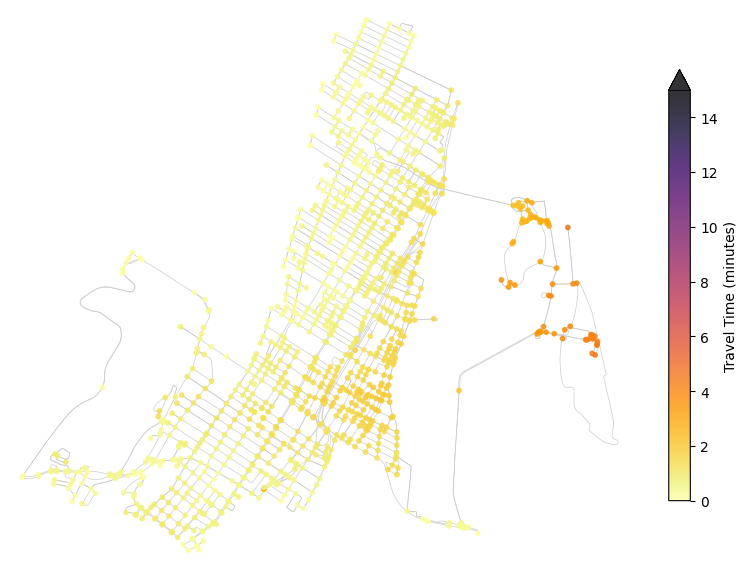

In [61]:
# TO TEST WITH ANOTHER LOCATION

G_drive_LaSalle = graphs['Ville-Marie, Montreal, Canada'] # access one graph
pandana_LaSalle = pandanas['Ville-Marie, Montreal, Canada'] # access one pandana network
distances_LaSalle_test = filtered_distances = df.loc['Ville-Marie, Montreal, Canada', 'amenity']

# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Ville-Marie, Montreal, Canada', network_type='drive')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)


# Set the actual data range
data_max = distances_LaSalle_test['travel_time'].max()

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=distances_LaSalle_test['travel_time'], s=10, cmap='inferno_r', alpha=0.8, vmin=0, vmax=15)

# Add colorbar with custom scale
cbar = plt.colorbar(sc, ax=ax, shrink=0.7, extend='max')  # Extend colorbar to cover full range
cbar.set_label('Travel Time (minutes)')  # Set colorbar label

# Show the plot
plt.show()

## Following from Michels code

### Walking 

In [22]:
def get_walking_distances(amenity):    
    place = 'Montreal, Canada'
    # Get all the "fresh food" stores on OSM within the study site
    tags = {'amenity': [amenity]}
    amenities = ox.features_from_place(place, tags=tags)
    amenities = amenities.to_crs('EPSG:25832')
    print(amenities)
    # Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
    centroids = amenities.centroid
    print(centroids)

    # graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs'
    graphs_dir = '../graphs/walk/'

    walk_graphs = {}
    for file_name in tqdm(os.listdir(graphs_dir)):
        if file_name.endswith(".graphml"):
            neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
            file_path = os.path.join(graphs_dir, file_name)
            G_walk_neighborhood = ox.load_graphml(file_path)
            graphs[neighborhood] = G_walk_neighborhood
                
    print(walk_graphs)
    walk_pandanas = {}
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]
        
        network = pdna.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network

    print(walk_pandanas)

    walk_time = 15  # max walking horizon in minutes
    walk_speed = 5  # km per hour
    walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


    walking_distances = {}
    for neighborhood, pandana in tqdm(pandanas.items()):
        pandana.set_pois(category=amenity, # amenity set here
                        maxdist=walk_time_sec,
                        maxitems=3,
                        x_col=centroids.x, 
                        y_col=centroids.y)
        
        distances = pandana.nearest_pois(distance=walk_time_sec,
                                        category=amenity, # amenity set here
                                        num_pois=3)
        
        distances['travel_time'] = distances[1] / 60
        walking_distances[neighborhood] = distances

    print(walking_distances)

    G_walk_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
    pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
    walking_distances_anjou = walking_distances['Anjou, Montreal, Canada']

In [80]:


def get_walking_distances(amenities_list):
    place = 'Montreal, Canada'
    # Get all the specified amenities on OSM within the study site
    walking_distances = {}
    
    for amenity in amenities_list:
        # Get amenities data
        tags = {'amenity': [amenity]}
        amenities = ox.features_from_place(place, tags=tags)
        amenities = amenities.to_crs('EPSG:25832')
        
        # Extract centroids
        centroids = amenities.centroid
        
        # Load graphs
        graphs_dir = '../graphs'
        graphs = {}
        for file_name in tqdm(os.listdir(graphs_dir)):
            if file_name.endswith(".graphml"):
                neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
                file_path = os.path.join(graphs_dir, file_name)
                G_walk_neighborhood = ox.load_graphml(file_path)
                graphs[neighborhood] = G_walk_neighborhood
        
        # Build Pandana networks
        pandanas = {}
        for neighborhood, graph in tqdm(graphs.items()):
            graph = ox.project_graph(graph, to_crs='EPSG:25832')
            nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
            edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]
            
            network = pdna.Network(node_x=nodes['x'],
                                   node_y=nodes['y'], 
                                   edge_from=edges['u'],
                                   edge_to=edges['v'],
                                   edge_weights=edges[['travel_time']])
            
            pandanas[neighborhood] = network
        
        # Calculate walking distances
        walk_time = 15  # max walking horizon in minutes
        walk_time_sec = walk_time * 60  # We need the time in seconds to match how travel time is calculated in OSMnx
        
        walking_distances[amenity] = {}
        for neighborhood, pandana in tqdm(pandanas.items()):
            pandana.set_pois(category=amenity,
                              maxdist=walk_time_sec,
                              maxitems=3,
                              x_col=centroids.x, 
                              y_col=centroids.y)
            
            distances = pandana.nearest_pois(distance=walk_time_sec,
                                             category=amenity,
                                             num_pois=3)
            
            distances['travel_time'] = distances[1] / 60
            walking_distances[amenity][neighborhood] = distances
    
    walking_distances_df = {}
    for amenity, distances_dict in walking_distances.items():
        # Create a Series from the distances dictionary
        distances_series = pd.Series(distances_dict)
        # Convert the Series to a DataFrame with a specified index
        walking_distances_df[amenity] = pd.DataFrame({'neighborhood': distances_series.index, 'travel_time': distances_series.values})

    return walking_distances_df


# Example usage:
amenities_list = ['restaurant', 'pharmacy']
walking_distances_df = get_walking_distances(amenities_list)


  6%|▌         | 1/18 [00:02<00:48,  2.84s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:05<00:45,  2.84s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:10<00:57,  3.86s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:11<00:35,  2.53s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:13<00:29,  2.26s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:16<00:32,  2.70s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:17<00:22,  2.02s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:17<00:15,  1.53s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:18<00:10,  1.22s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:18<00:08,  1.02s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 61%|██████    | 11/18 [00:21<00:09,  1.39s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [00:25<00:13,  2.18s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [00:25<00:07,  1.59s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [00:27<00:07,  1.91s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [00:28<00:04,  1.51s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 89%|████████▉ | 16/18 [00:33<00:04,  2.46s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [00:33<00:01,  1.80s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [00:34<00:00,  1.92s/it]


Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


  6%|▌         | 1/18 [00:02<00:35,  2.09s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:06<00:55,  3.48s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:10<00:53,  3.57s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:12<00:42,  3.03s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:14<00:33,  2.56s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:16<00:28,  2.40s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:16<00:19,  1.81s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:18<00:18,  1.82s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:19<00:12,  1.43s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:19<00:09,  1.16s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 61%|██████    | 11/18 [00:21<00:10,  1.48s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [00:25<00:13,  2.21s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [00:26<00:08,  1.61s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [00:28<00:07,  1.97s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [00:29<00:04,  1.54s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [00:34<00:05,  2.60s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [00:34<00:01,  1.90s/it]

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [00:35<00:00,  2.00s/it]


Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


100%|██████████| 18/18 [00:00<00:00, 25.70it/s]


In [103]:
# reindex dataframe with neighborhood names as index for each amenity
all_distances_walk = pd.concat([df.assign(neighborhood=name) for name, df in walking_distances.items()], ignore_index=True)
all_distances_walk = all_distances_walk.sort_values(by='travel_time')

In [91]:
walking_distances_df['pharmacy']['travel_time'][0]

,1,2,3,travel_time
osmid,,,,
26232893,703.400024,703.400024,732.500000,11.723334
11495723273,714.299988,714.299988,743.400024,11.905000
11495723274,696.200012,696.200012,725.299988,11.603334
11495717756,733.099976,733.099976,762.200012,12.218333
30914720,566.700012,900.000000,900.000000,9.445000
...,...,...,...,...
11862799553,900.000000,900.000000,900.000000,15.000000
11862799552,900.000000,900.000000,900.000000,15.000000
11862799555,900.000000,900.000000,900.000000,15.000000


In [92]:
walking_distances_df['restaurant']['travel_time'][0]

,1,2,3,travel_time
osmid,,,,
26232893,514.799988,703.400024,703.400024,8.580000
11495723273,525.700012,705.200012,714.299988,8.761667
11495723274,507.600006,696.200012,696.200012,8.460000
11495717756,544.500000,733.099976,733.099976,9.075000
30914720,292.799988,307.100006,451.899994,4.880000
...,...,...,...,...
11862799553,821.299988,900.000000,900.000000,13.688333
11862799552,834.900024,900.000000,900.000000,13.915000
11862799555,834.099976,900.000000,900.000000,13.901666


NameError: name 'walking_distances_df' is not defined

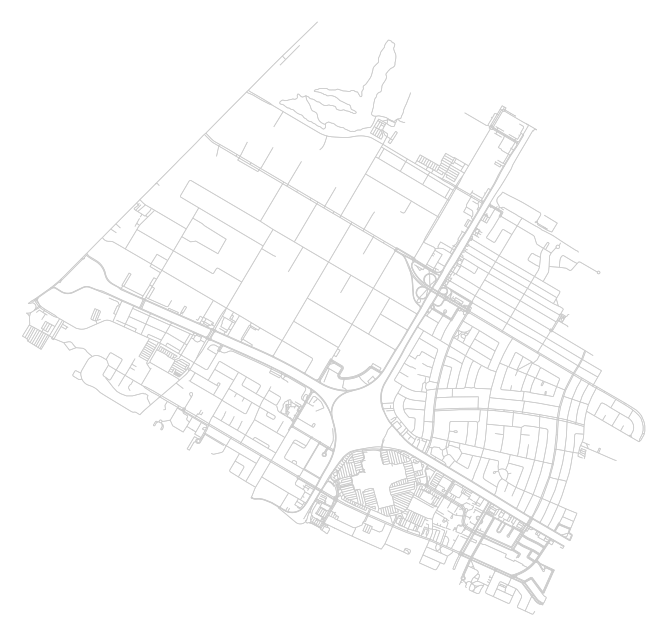

In [23]:
# test with restaurant graph to compare

# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Anjou, Montreal, Canada', network_type='walk')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=walking_distances_df['travel_time'], s=10, cmap='inferno_r', alpha=0.8)

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.7)

# Show the plot
plt.show()

ValueError: setting an array element with a sequence.

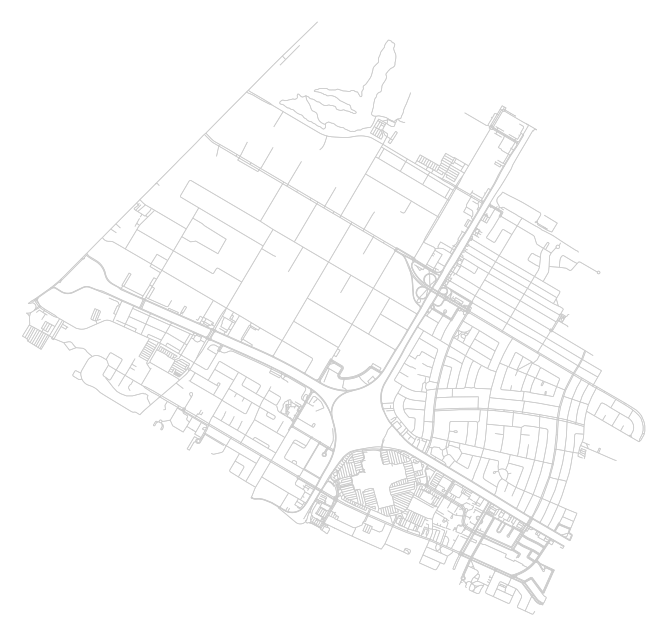

In [100]:
# test with school to see if there is a difference 

# Filter the DataFrame based on the 'neighborhood' column
filtered_df = walking_distances_df[amenity][walking_distances_df[amenity]['neighborhood'] == neighborhood]
# Access the 'travel_time' column of the filtered DataFrame



# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Anjou, Montreal, Canada', network_type='walk')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=filtered_distances['travel_time'], s=10, cmap='inferno_r', alpha=0.8)

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.7)

# Show the plot
plt.show()

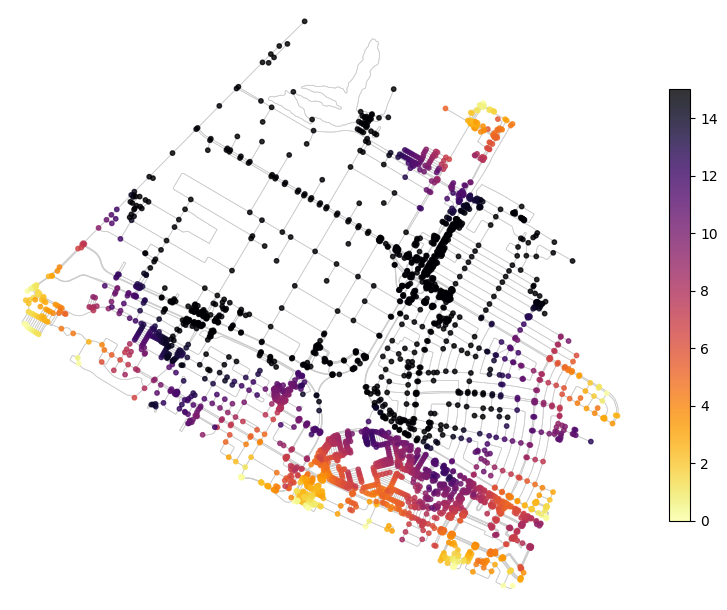

In [73]:
# test with restaurant graph to compare

# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Anjou, Montreal, Canada', network_type='walk')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=walking_distances_anjou['travel_time'], s=10, cmap='inferno_r', alpha=0.8)

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.7)

# Show the plot
plt.show()

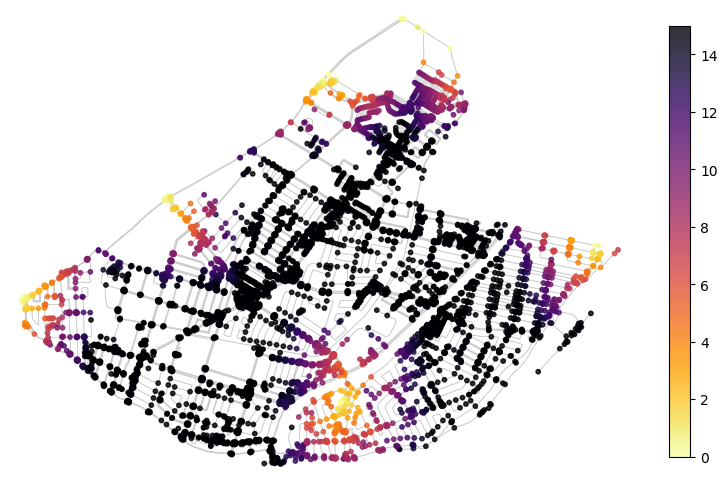

In [77]:


# test with restaurant graph to compare

# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('LaSalle, Montreal, Canada', network_type='walk')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=walking_distances['LaSalle, Montreal, Canada']['travel_time'], s=10, cmap='inferno_r', alpha=0.8)

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.7)

# Show the plot
plt.show()

### Biking

In [ ]:
# STILL NEED TO CHANGE THE TIMES DOWN HERE
bike_graphs = {}
for file_name in tqdm(os.listdir(graphs_dir)):
    if file_name.endswith(".graphml"):
        neighborhood = file_name.replace("G_bike_", "").replace(".graphml", "")
        file_path = os.path.join(graphs_dir, file_name)
        G_bike_neighborhood = ox.load_graphml(file_path)
        graphs[neighborhood] = G_bike_neighborhood
            

bike_pandanas = {}
# Build Pandana network for each neighborhood
for neighborhood, graph in tqdm(graphs.items()):
    graph = ox.project_graph(graph, to_crs='EPSG:25832')
    nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
    edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

    network = pdna.Network(node_x=nodes['x'],
                            node_y=nodes['y'], 
                            edge_from=edges['u'],
                            edge_to=edges['v'],
                            edge_weights=edges[['travel_time']])
    
    pandanas[neighborhood] = network

# CHANGE THE TIMES HERE

bike_time = 15  # max biking horizon in minutes
bike_speed = 5  # km per hour
bike_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


biking_distances = {}
for neighborhood, pandana in tqdm(pandanas.items()):
    pandana.set_pois(category='restaurant', # amenity set here
                    maxdist=bike_time_sec,
                    maxitems=3,
                    x_col=centroids.x, 
                    y_col=centroids.y)
    
    distances = pandana.nearest_pois(distance=bike_time_sec,
                                    category='restaurant', # amenity set here
                                    num_pois=3)
    
    distances['travel_time'] = distances[1] / 60
    biking_distances[neighborhood] = distances
        
# G_walk_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
# pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
biking_distances_anjou = biking_distances['Anjou, Montreal, Canada']

### Driving

In [60]:
# function for plotting
def plot_neighborhood_graph(mode_of_transportation_graph, mode_of_transportation_distances, neighbourhood):
    # Load the graph from the specified place and network type
    G = mode_of_transportation_graph
    # CRS
    G_proj = ox.project_graph(G)
    
    distances = mode_of_transportation_distances[f"{neighbourhood}, Montreal, Canada"]
    
    # Plot the graph with a light background
    fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)
    
    # Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    
    # Scatter plot on the same Axes instance
    sc = ax.scatter(x=nodes_proj["x"], y=nodes_proj["y"], c=distances['travel_time'], s=50, cmap='inferno_r', alpha=0.8)
    
    # Add colorbar
    plt.colorbar(sc, ax=ax, shrink=0.7)
    
    # Show the plot
    plt.show()



In [65]:
# example usage
plot_neighborhood_graph(G_walk_anjou, walking_distances_anjou, 'Anjou')

KeyError: 'Anjou, Montreal, Canada'

In [ ]:
# test ploting with plotly

def plot_neighborhood_graph_plotly(mode_of_transportation_graph, mode_of_transportation_distances, neighbourhood):
    # Load the graph from the specified place and network type
    G = mode_of_transportation_graph
    # CRS
    G_proj = ox.project_graph(G)
    
    distances = mode_of_transportation_distances[f"{neighbourhood}, Montreal, Canada"]
    
    # Extract node positions
    nodes_proj, _ = ox.graph_to_gdfs(G_proj, edges=False)
    
    # Create edge trace
    edge_trace = []
    for edge in G_proj.edges():
        x0, y0 = G_proj.nodes[edge[0]]['x'], G_proj.nodes[edge[0]]['y']
        x1, y1 = G_proj.nodes[edge[1]]['x'], G_proj.nodes[edge[1]]['y']
        edge_trace.append(go.Scattermapbox(
                mode = 'lines',
                lon = [x0, x1],
                lat = [y0, y1],
                line = dict(width = 1, color = '#CCCCCC'),
                opacity=0.5
            ))
    
    # Create node trace
    node_trace = go.Scattermapbox(
        lon=nodes_proj["x"],
        lat=nodes_proj["y"],
        mode='markers',
        marker=dict(
            size=10,
            color=distances['travel_time'],
            colorscale='inferno_r',
            opacity=0.8
        ),
        text=[f"Node: {n}" for n in nodes_proj.index],
    )
    
    # Create colorbar
    colorbar = go.ColorBar(
        title='Travel Time'
    )
    
    # Create layout
    layout = go.Layout(
        title='Neighborhood Map',
        mapbox=dict(
            center=dict(lat=nodes_proj['y'].mean(), lon=nodes_proj['x'].mean()),
            style="carto-positron",
            zoom=10
        ),
        coloraxis_colorbar=colorbar
    )
    
    # Create figure
    fig = go.Figure(data=edge_trace + [node_trace], layout=layout)
    fig.show()
